In this notebook I tried diffrent vectorizations method with the best classifier so far(SVM).

# Diffrent Vectorization

- tf-idf -> 55%
- Count Vectorizer: Fast and simple. -> 50%
- Word Embeddings (Word2Vec, GloVe, FastText): Capture semantic relationships between words. -> 52%
- Doc2Vec: Capture document-level semantics. -> 46%
- LSA (SVD): Dimensionality reduction to capture latent structures. -> 53%
- BERT Embeddings: State-of-the-art context-aware embeddings. -> 54%
- Hashing Vectorizer: Efficient for large vocabularies. -> 55%
- N-grams: Capture word sequences and combinations. -> 56%

| Method of Vectorization                                      | Accuracy |
|--------------------------------------------------------------|----------|
| TF-IDF                                                       | 55%      |
| Count Vectorizer                           | 50%      |
| Word Embeddings (Word2Vec, GloVe, FastText) | 52%      |
| Doc2Vec                | 46%      |
| LSA (SVD) | 53%      |
| BERT Embeddings   | 54%      |
| Hashing Vectorizer        | 55%      |
| N-grams          | 56%      |


## TF-IDF

Classification Report:
               precision    recall  f1-score   support

        Easy       0.64      0.59      0.61       684
      Medium       0.47      0.51      0.49       694
        Hard       0.56      0.55      0.56       622

    accuracy                           0.55      2000
   macro avg       0.56      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



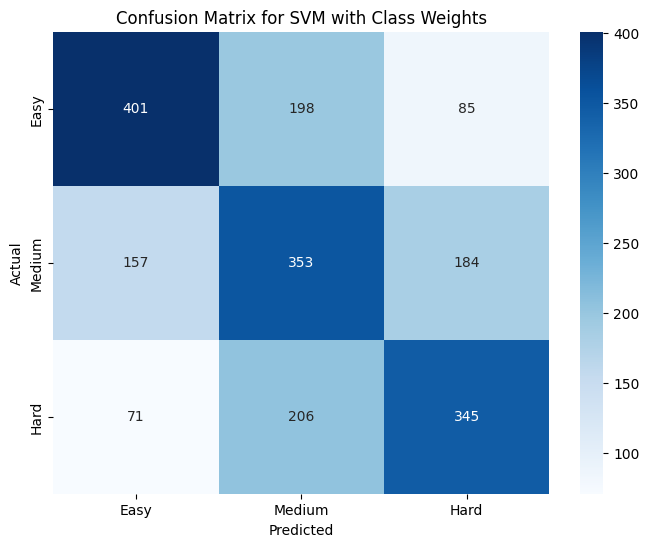

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

data = pd.read_csv("../data/data.csv")

data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

tfidf_features = TfidfVectorizer(max_features=5000)
tfidf_comments = TfidfVectorizer(max_features=5000)

X_tfidf_features = tfidf_features.fit_transform(data['features'])
X_tfidf_comments = tfidf_comments.fit_transform(data['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_tfidf_features, X_tfidf_comments])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()


## Bag of words

Classification Report:
               precision    recall  f1-score   support

        Easy       0.61      0.53      0.57       684
      Medium       0.43      0.53      0.47       694
        Hard       0.48      0.43      0.45       622

    accuracy                           0.50      2000
   macro avg       0.51      0.50      0.50      2000
weighted avg       0.51      0.50      0.50      2000



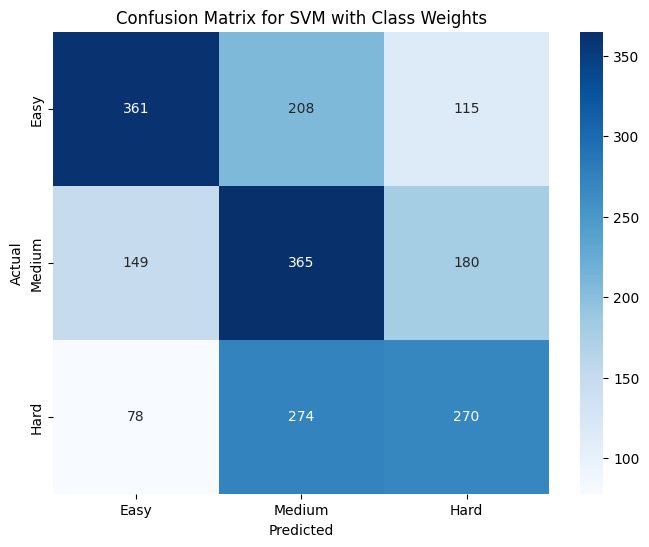

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

# Load data
data = pd.read_csv("../data/data.csv")

# Adjust the target variable
data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

# Use Count Vectorizer for features and comments
count_vectorizer_features = CountVectorizer(max_features=5000)
count_vectorizer_comments = CountVectorizer(max_features=5000)

X_count_features = count_vectorizer_features.fit_transform(data['features'])
X_count_comments = count_vectorizer_comments.fit_transform(data['comments'].fillna(''))

# Combine the two sets of features
X_combined = scipy.sparse.hstack([X_count_features, X_count_comments])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler(with_mean=False)  # Sparse matrices do not support centering
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the SVM classifier
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predict the labels on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()


## Word2Vec / GloVe

[nltk_data] Downloading package punkt to /home/lewelotki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Classification Report:
               precision    recall  f1-score   support

        Easy       0.60      0.58      0.59       684
      Medium       0.46      0.48      0.47       694
        Hard       0.51      0.51      0.51       622

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.53      0.52      0.52      2000



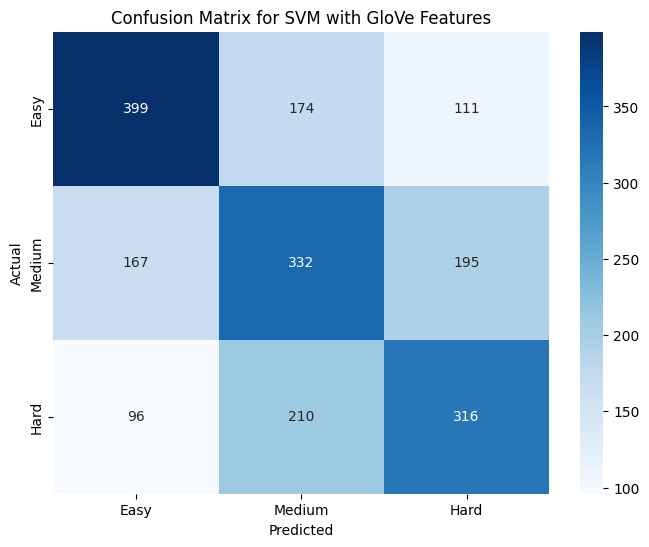

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from nltk.tokenize import word_tokenize
import nltk

# Download required resources for tokenization
nltk.download('punkt')

# Load data
data = pd.read_csv("../data/data.csv")

# Adjust the target variable
data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

# Load pre-trained GloVe model
def load_glove_model(glove_file):
    model = {}
    with open(glove_file, 'r', encoding="utf8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            model[word] = embedding
    return model

# Path to the GloVe file (you can choose the 100d, 200d, or 300d model)
glove_file = './glove.6B/glove.6B.300d.txt'
glove_model = load_glove_model(glove_file)

# Function to compute the document vector by averaging word vectors
def get_average_glove(tokens_list, glove_model, size=300):
    vectors = [glove_model[word] for word in tokens_list if word in glove_model]
    if len(vectors) == 0:
        return np.zeros(size)
    else:
        return np.mean(vectors, axis=0)

# Tokenize the features and comments columns
data['tokenized_features'] = data['features'].apply(lambda x: word_tokenize(str(x).lower()))
data['tokenized_comments'] = data['comments'].fillna('').apply(lambda x: word_tokenize(str(x).lower()))

# Compute average GloVe vectors for features and comments
X_glove_features = np.array([get_average_glove(tokens, glove_model, 300) for tokens in data['tokenized_features']])
X_glove_comments = np.array([get_average_glove(tokens, glove_model, 300) for tokens in data['tokenized_comments']])

# Combine features and comments vectors
X_combined = np.hstack([X_glove_features, X_glove_comments])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the SVM classifier
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predict the labels on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with GloVe Features')
plt.show()


## Doc2Vec

[nltk_data] Downloading package punkt to /home/lewelotki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Classification Report:
               precision    recall  f1-score   support

        Easy       0.47      0.65      0.54       684
      Medium       0.44      0.30      0.35       694
        Hard       0.46      0.44      0.45       622

    accuracy                           0.46      2000
   macro avg       0.46      0.46      0.45      2000
weighted avg       0.46      0.46      0.45      2000



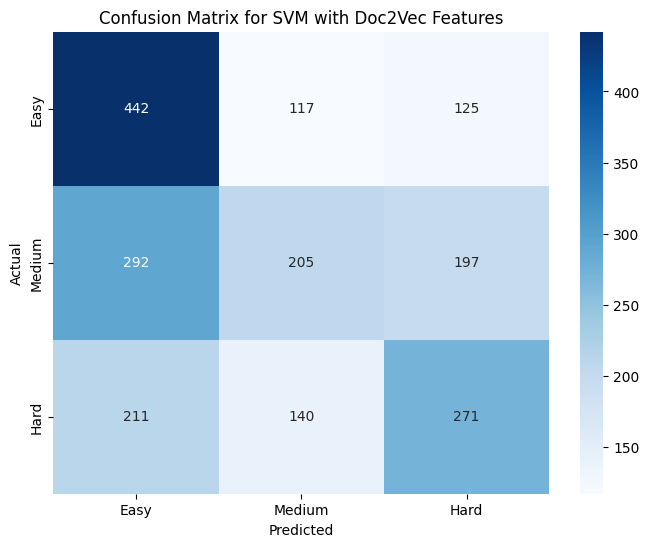

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk

# Download required resources for tokenization
nltk.download('punkt')

# Load data
data = pd.read_csv("../data/data.csv")

# Adjust the target variable
data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

# Prepare documents for Doc2Vec (combine 'features' and 'comments')
documents = [TaggedDocument(words=word_tokenize(str(row['features']) + " " + str(row['comments']).lower()), tags=[str(i)]) for i, row in data.iterrows()]

# Train a Doc2Vec model
doc2vec_model = Doc2Vec(documents, vector_size=300, window=5, min_count=2, workers=4, epochs=40)

# Transform each document into a vector using Doc2Vec
X_doc2vec = np.array([doc2vec_model.infer_vector(word_tokenize(str(row['features']) + " " + str(row['comments']).lower())) for _, row in data.iterrows()])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_doc2vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the SVM classifier
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predict the labels on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Doc2Vec Features')
plt.show()


## LSA

Classification Report:
               precision    recall  f1-score   support

        Easy       0.62      0.59      0.60       684
      Medium       0.45      0.46      0.45       694
        Hard       0.53      0.55      0.54       622

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000



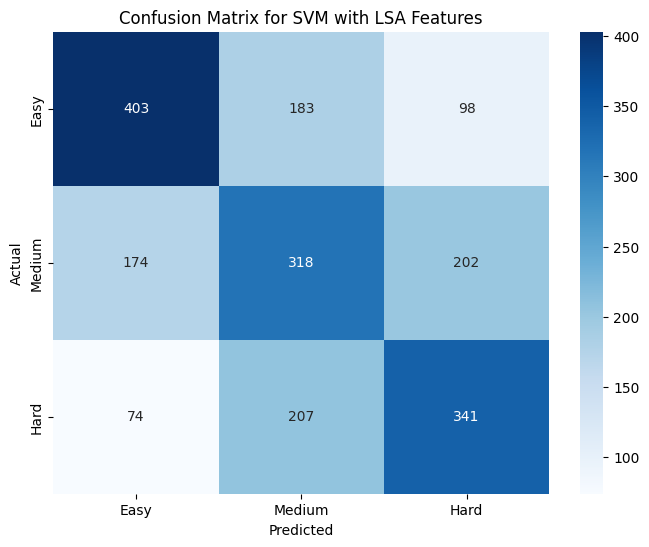

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

# Load data
data = pd.read_csv("../data/data.csv")

# Adjust the target variable
data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

# Use TF-IDF for feature extraction
tfidf_features = TfidfVectorizer(max_features=5000)
tfidf_comments = TfidfVectorizer(max_features=5000)

X_tfidf_features = tfidf_features.fit_transform(data['features'])
X_tfidf_comments = tfidf_comments.fit_transform(data['comments'].fillna(''))

# Combine features and comments vectors
X_combined = scipy.sparse.hstack([X_tfidf_features, X_tfidf_comments])

# Perform LSA using TruncatedSVD (Dimensionality Reduction)
svd = TruncatedSVD(n_components=300, random_state=42)  # Adjust n_components to keep 300 dimensions
X_lsa = svd.fit_transform(X_combined)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lsa, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the SVM classifier
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predict the labels on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with LSA Features')
plt.show()


## BERT

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Classification Report:
               precision    recall  f1-score   support

        Easy       0.61      0.59      0.60       684
      Medium       0.49      0.50      0.50       694
        Hard       0.52      0.53      0.53       622

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000



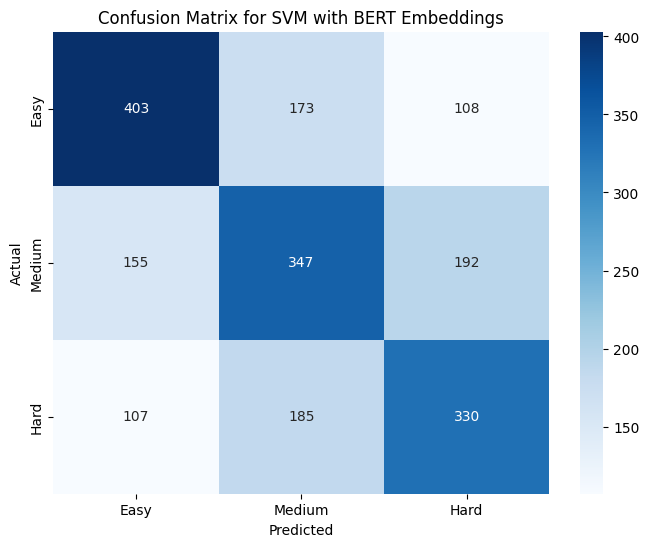

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import torch
from transformers import BertTokenizer, BertModel
import numpy as np

# Load data
data = pd.read_csv("../data/data.csv")

# Adjust the target variable
data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Apply BERT embeddings to both 'features' and 'comments' columns
data['bert_features'] = data['features'].apply(lambda x: get_bert_embeddings(str(x), tokenizer, model))
data['bert_comments'] = data['comments'].fillna('').apply(lambda x: get_bert_embeddings(str(x), tokenizer, model))

# Convert embeddings to numpy arrays
X_bert_features = np.stack(data['bert_features'].values)
X_bert_comments = np.stack(data['bert_comments'].values)

# Combine the embeddings from 'features' and 'comments'
X_combined = np.hstack([X_bert_features, X_bert_comments])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the SVM classifier
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predict the labels on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with BERT Embeddings')
plt.show()


## Hashing Vectorizer

Classification Report:
               precision    recall  f1-score   support

        Easy       0.62      0.60      0.61       684
      Medium       0.47      0.50      0.49       694
        Hard       0.56      0.55      0.56       622

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



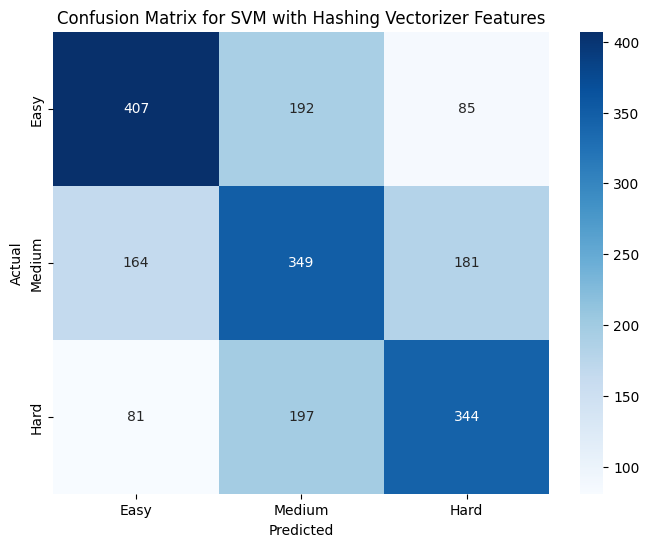

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

# Load data
data = pd.read_csv("../data/data.csv")

# Adjust the target variable
data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

# Use HashingVectorizer for 'features' and 'comments'
hashing_features = HashingVectorizer(n_features=5000, alternate_sign=False)
hashing_comments = HashingVectorizer(n_features=5000, alternate_sign=False)

X_hash_features = hashing_features.transform(data['features'])
X_hash_comments = hashing_comments.transform(data['comments'].fillna(''))

# Combine the two hashed feature sets
X_combined = scipy.sparse.hstack([X_hash_features, X_hash_comments])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the SVM classifier
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = svm_classifier.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Hashing Vectorizer Features')
plt.show()


## N-grams

Classification Report:
               precision    recall  f1-score   support

        Easy       0.66      0.61      0.63       684
      Medium       0.47      0.52      0.50       694
        Hard       0.57      0.56      0.57       622

    accuracy                           0.56      2000
   macro avg       0.57      0.56      0.57      2000
weighted avg       0.57      0.56      0.57      2000



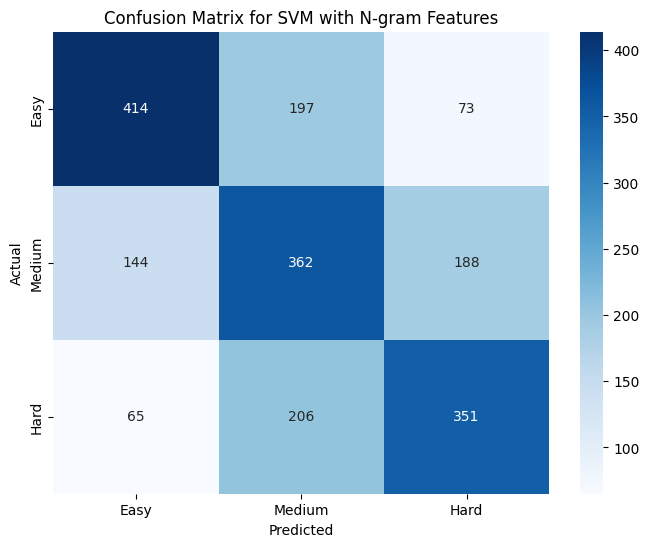

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

# Load data
data = pd.read_csv("../data/data.csv")

# Adjust the target variable
data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

# Use TfidfVectorizer with N-grams for 'features' and 'comments'
# We capture unigrams, bigrams, and trigrams (ngram_range=(1, 3))
ngram_features = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
ngram_comments = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

X_ngram_features = ngram_features.fit_transform(data['features'])
X_ngram_comments = ngram_comments.fit_transform(data['comments'].fillna(''))

# Combine the N-gram feature sets
X_combined = scipy.sparse.hstack([X_ngram_features, X_ngram_comments])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the SVM classifier
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = svm_classifier.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with N-gram Features')
plt.show()


# Random changes

Classification Report:
               precision    recall  f1-score   support

        Easy       0.66      0.61      0.63       684
      Medium       0.47      0.52      0.50       694
        Hard       0.57      0.56      0.57       622

    accuracy                           0.56      2000
   macro avg       0.57      0.56      0.57      2000
weighted avg       0.57      0.56      0.57      2000



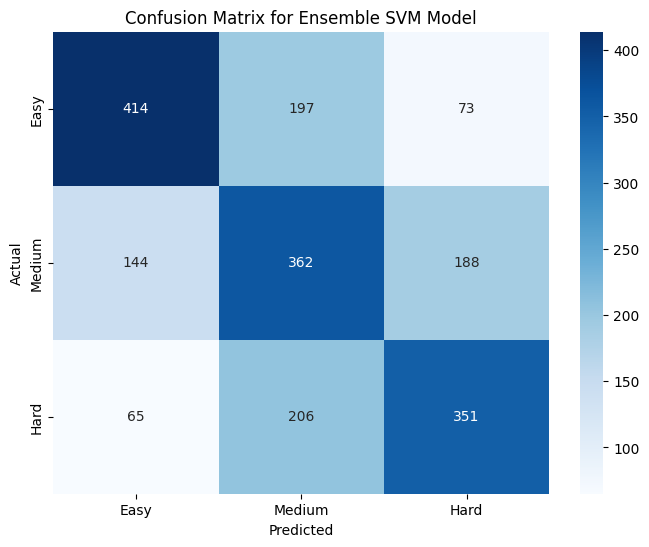

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier

# Load data
data = pd.read_csv("../data/data.csv")

# Adjust the target variable
data['target'] = data['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['target'])

# Use TfidfVectorizer with N-grams for 'features' and 'comments'
ngram_features = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
ngram_comments = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

X_ngram_features = ngram_features.fit_transform(data['features'])
X_ngram_comments = ngram_comments.fit_transform(data['comments'].fillna(''))

# Combine the N-gram feature sets
X_combined = scipy.sparse.hstack([X_ngram_features, X_ngram_comments])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Number of chunks for training the ensemble SVMs
n_chunks = 5
X_train_chunks = np.array_split(X_train.toarray(), n_chunks)
y_train_chunks = np.array_split(y_train, n_chunks)

# List to hold individual SVM classifiers
svm_classifiers = []

# Train a different SVM for each chunk
for i in range(n_chunks):
    svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
    svm_classifier.fit(X_train_chunks[i], y_train_chunks[i])
    svm_classifiers.append((f'svm_{i}', svm_classifier))

# Create a voting classifier ensemble
ensemble_model = VotingClassifier(estimators=svm_classifiers, voting='hard')

# Fit the ensemble model on the entire training set
ensemble_model.fit(X_train.toarray(), y_train)

# Predict the labels on the test set
y_pred = ensemble_model.predict(X_test.toarray())

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble SVM Model')
plt.show()
